<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1226_%EC%99%84%EB%B2%BD%EA%B0%80(377~408)_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 차원축소 


* 수백 개 

# 02 PCA

## 1. PCA 개요

* PCA는 여러 변수 간에 존재하는 상관관계를 이용해  
  이를 대표하는 주성분을 추출해 차원을 축소하는 기법
* PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.  
  (분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)
* PCA의 스텝     
  1. 입력 데이터셋의 공분산 행렬을 생성
  2. 공분산 행렬의 고유벡터와 고유값을 계산
  3. 고유값이 가장 큰 순으로 K개 (PCA 변환 차수)만큼 고유벡터를 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다. 

### * 붓꽃 데이터를 압축
* 붓꽃 데이터셋은 	sepal_length	sepal_width	petal_length	petal_width	의 4개의 속성으로 되어있음
* 이 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 어떻게 달라지는지 보자.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 DF로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### * 품종에 따라 원본 데이터셋이 어떻게 분포돼있는지 2차원으로 시각화
* sepal_width, sepal_length 의 분포를 먼저 본다.

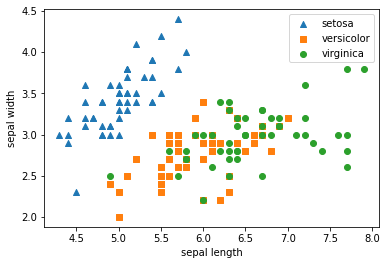

In [6]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

* Setosa(세모) 품종의 경우, width 3이상 length 6이하 인 곳에 일정하게 분포
* Versi(네모), virgi(동그라미) 품종의 경우, sepal width와 length 조건만으로는 분류가 어려운 복잡한 조건이다.

### * 이제 PCA로 4개 속성을 2개로 압축해 2차원으로 시각화
* 바로 PCA 적용하기 전에 개별 속성을 함께 스케일링 해야 한다.    
  여러 속성의 값을 연산해야 해서 속성의 스케일에 영향 받기 때문. 
* 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요.    
standardscaler 이용.

In [8]:
from sklearn.preprocessing import StandardScaler

#target 값을 제외한 모든 속성 값을 standardscaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:, :-1])
     

In [9]:
# 이제 PCA 변환
from sklearn.decomposition import PCA

pca=PCA(n_components=2) #PCA로 변환할 차원의 수를 의미.

#fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [10]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명.
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


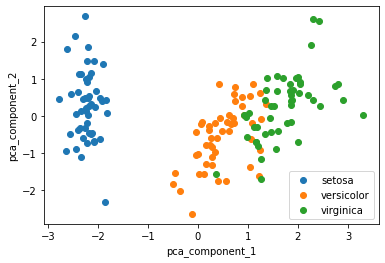

In [11]:
# 시각화

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, maker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

* Setosa(세모) 품종의 경우, 여전히 명확하게 구분 가능
Versi(네모), virgi(동그라미) 품종의 경우, 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분
* pca 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문. 

### * pca component 별로 원본 데이터의 변동성을 얼마나 잘 반영하고 있는지 알아보자. explained_variance_ratio_ 속성 이용.

In [12]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


* 첫 번째 pca 변환 요소인 pca_component_1이 전체 변동성의 72.9% 차지. 
* 두번째 pca_component_2가 22.8% 차지.     
  -> 이렇게 두개로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다는 것.

### * 이번에는 원본과 pca 변환된 데이터 세트 각각에 분류를 적용한 후 결과 비교하자. 랜덤포레스트 적용.

In [13]:
#먼저 원본
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
#pca 변환한거
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


* 변환한건 변환 차원 개수에 따라 예측 성능 떨어질 수 밖에 없음.     
  붓꽃 데이터는 예측 성능의 정확도가 변환한 데이터가 원본 대비 10% 하락.
* 꽤 큰 성능 수치 감소지만     
  속성 개수는 50% 감소한 것을 고려하면 변환 후에도 원본 데이터 특성을 상당 부분 유지하고 있음.